# Milestone 3: Performance Trend Analysis & Geographic Insights

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("IT_Support_Cleaned.csv")

# view dataset
df.head(5)  # first 5 rows
print("Columns:", df.columns)
print("Number of rows and columns:", df.shape)
df.info()  # data types and missing values

Columns: Index(['Issue_Description', 'Department', 'Priority', 'Tags', 'Start_Time',
       'End_Time', 'Ticket_ID', 'Resolution_Hours', 'Priority_Score',
       'Ticket_Type', 'Cluster_ID'],
      dtype='object')
Number of rows and columns: (12563, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Issue_Description  12563 non-null  object 
 1   Department         12563 non-null  object 
 2   Priority           12563 non-null  object 
 3   Tags               12563 non-null  object 
 4   Start_Time         12563 non-null  object 
 5   End_Time           12563 non-null  object 
 6   Ticket_ID          12563 non-null  int64  
 7   Resolution_Hours   12563 non-null  float64
 8   Priority_Score     12563 non-null  int64  
 9   Ticket_Type        12563 non-null  object 
 10  Cluster_ID         12563 non-null  int64  
dtypes: float

Average Resolution Time by Priority

In [20]:
avg_res_priority = df.groupby('Priority')['Resolution_Hours'].mean()
print("Average Resolution Hours by Priority:\n", avg_res_priority)

Average Resolution Hours by Priority:
 Priority
high      3389.008468
low       3485.712796
medium    3396.215929
Name: Resolution_Hours, dtype: float64


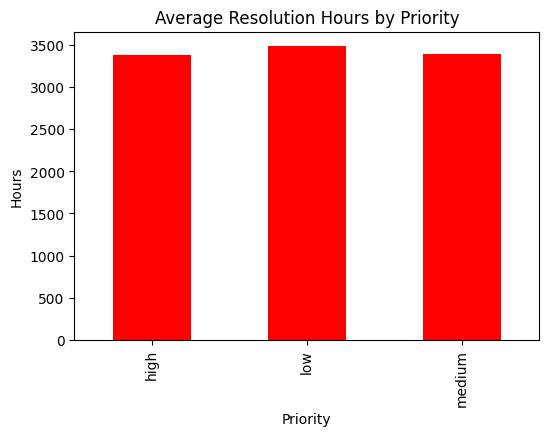

In [41]:
plt.figure(figsize=(6,4))
avg_res_priority.plot(kind='bar', color='red')
plt.title("Average Resolution Hours by Priority")
plt.ylabel("Hours")
plt.show()

Average Resolution Time by Ticket Type

In [22]:
avg_res_type = df.groupby('Ticket_Type')['Resolution_Hours'].mean()
print("Average Resolution Hours by Ticket Type:\n", avg_res_type)

Average Resolution Hours by Ticket Type:
 Ticket_Type
Incident    3690.855312
Other       3448.718982
Problem     3129.046058
Request     3562.761729
Name: Resolution_Hours, dtype: float64


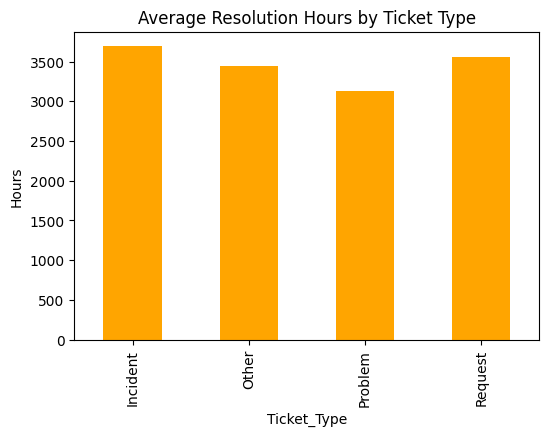

In [43]:
plt.figure(figsize=(6,4))
avg_res_type.plot(kind='bar', color='orange')
plt.title("Average Resolution Hours by Ticket Type")
plt.ylabel("Hours")
plt.show()

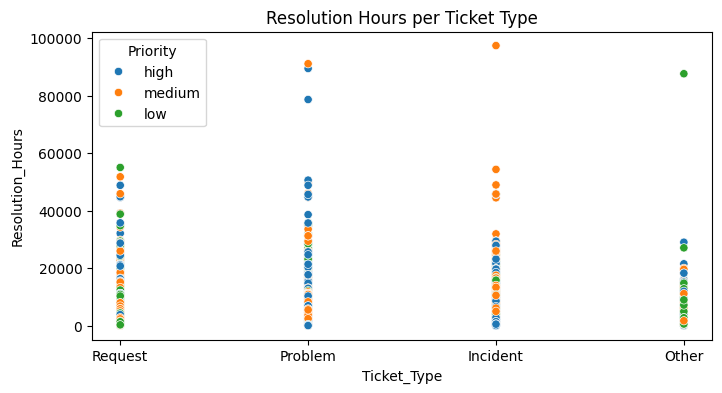

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Ticket_Type', y='Resolution_Hours', hue='Priority')
plt.title('Resolution Hours per Ticket Type')
plt.show()

Which Team (Department) Handles Tickets Fastest

In [25]:
df['Team'] = df['Department']

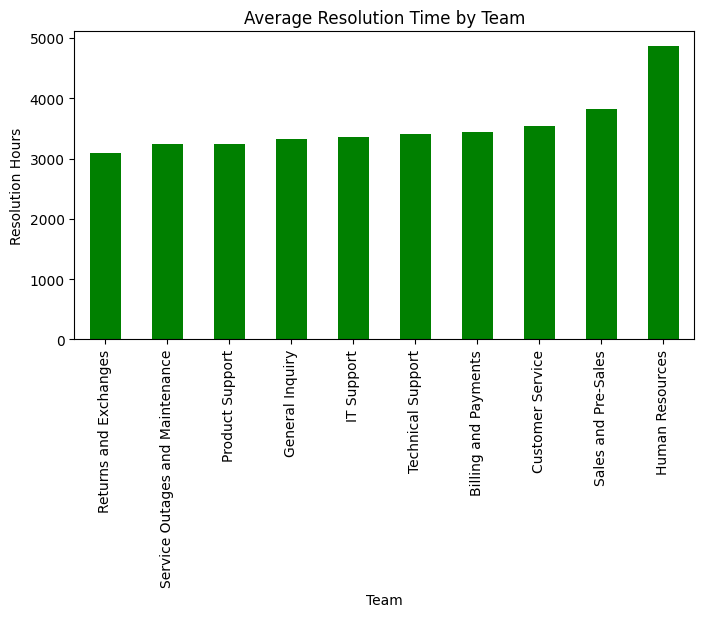

In [26]:
plt.figure(figsize=(8,4))
df.groupby('Team')['Resolution_Hours'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Average Resolution Time by Team')
plt.ylabel('Resolution Hours')
plt.show()

High-Priority Unresolved / Slow Tickets

In [27]:
high_unresolved = df[(df['Priority']=='high') & (df['Resolution_Hours'] > 48)]
print("High-priority unresolved tickets:\n", high_unresolved[['Ticket_ID','Ticket_Type','Resolution_Hours']].head())

High-priority unresolved tickets:
     Ticket_ID Ticket_Type  Resolution_Hours
4         217     Request        136.598611
5         221     Problem        301.166667
9         243     Request       4540.899444
12        252     Request        335.838333
16        264     Request        142.215556


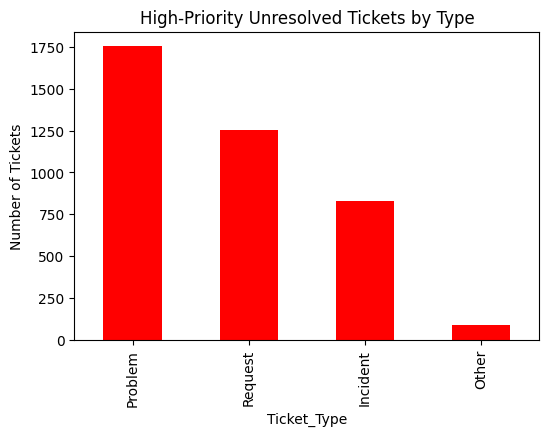

In [28]:
plt.figure(figsize=(6,4))
high_unresolved['Ticket_Type'].value_counts().plot(kind='bar', color='red')
plt.title("High-Priority Unresolved Tickets by Type")
plt.ylabel("Number of Tickets")
plt.show()

Fastest Ticket Resolution by Country

In [29]:
countries = ['USA', 'UK', 'India', 'Germany', 'Australia']
np.random.seed(42)
df['Country'] = np.random.choice(countries, size=len(df))

df[['Ticket_ID','Country']].head()

,Ticket_ID,Country
0,186,Germany
1,190,Australia
2,198,India
3,209,Australia
4,217,Australia


Country
India        3305.186046
Australia    3350.608763
UK           3451.647459
USA          3468.603454
Germany      3478.288237
Name: Resolution_Hours, dtype: float64


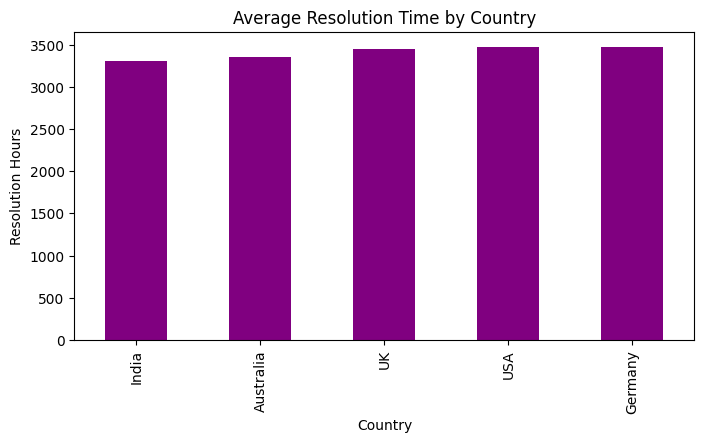

In [30]:
avg_country = df.groupby('Country')['Resolution_Hours'].mean().sort_values()
print(avg_country)

plt.figure(figsize=(8,4))
avg_country.plot(kind='bar', color='purple')
plt.title("Average Resolution Time by Country")
plt.xlabel("Country")
plt.ylabel("Resolution Hours")
plt.show()


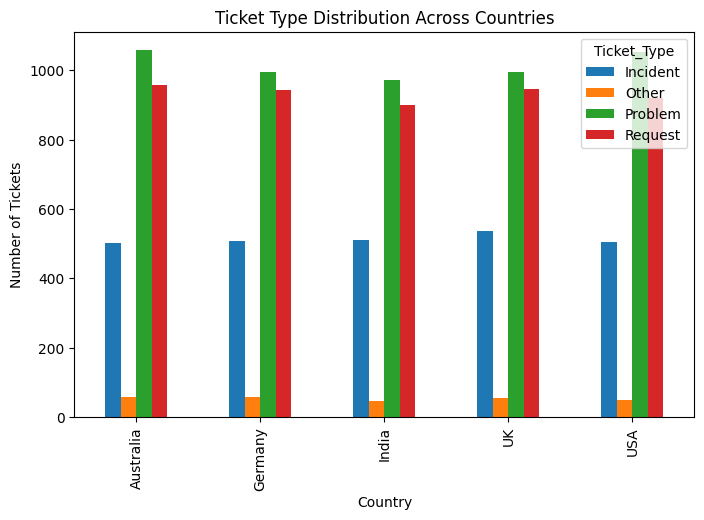

In [31]:
country_ticket = df.groupby(['Country','Ticket_Type']).size().unstack(fill_value=0)

country_ticket.plot(kind='bar', stacked=False, figsize=(8,5))
plt.title('Ticket Type Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Tickets')
plt.show()


Heatmap: Ticket Concentration by Country & Team

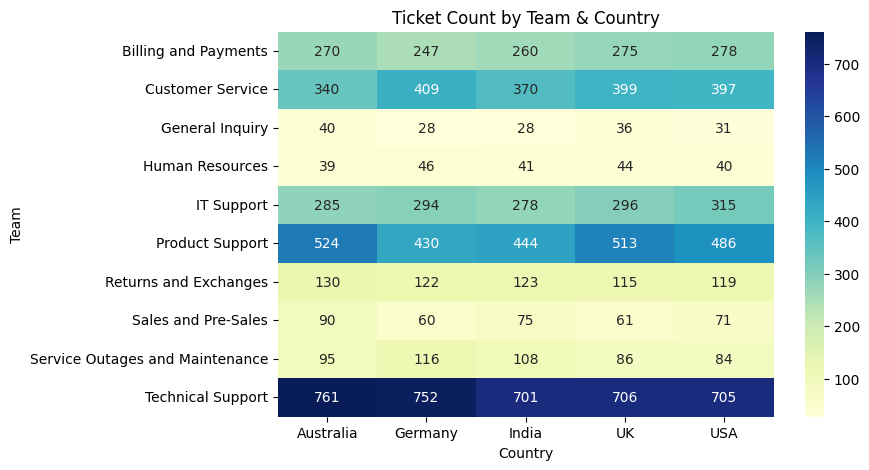

In [32]:
pivot_country_team = df.pivot_table(
    index='Team',
    columns='Country',
    values='Ticket_ID',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_country_team, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Ticket Count by Team & Country")
plt.show()


Cluster Size vs Performance Score

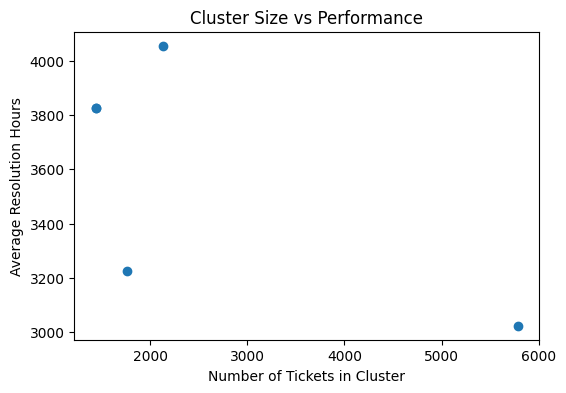

In [33]:
cluster_size = df.groupby('Cluster_ID').size()
cluster_perf = df.groupby('Cluster_ID')['Resolution_Hours'].mean()

plt.figure(figsize=(6,4))
plt.scatter(cluster_size, cluster_perf)
plt.title("Cluster Size vs Performance")
plt.xlabel("Number of Tickets in Cluster")
plt.ylabel("Average Resolution Hours")
plt.show()


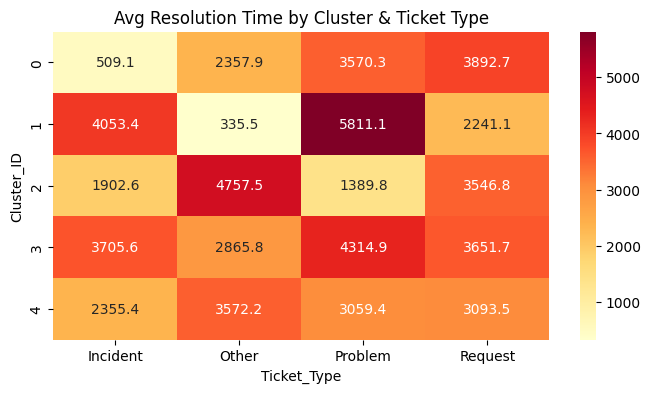

In [34]:
pivot_cluster_type = df.pivot_table(
    values='Resolution_Hours',
    index='Cluster_ID',
    columns='Ticket_Type',
    aggfunc='mean'
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot_cluster_type, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Avg Resolution Time by Cluster & Ticket Type")
plt.show()


In [45]:
df.to_csv("IT_Support_Cleaned.csv", index=False)